In [1]:
from création_data import param_Dataset
import fonction_model as f
from IPython.display import display, Audio
from scipy.io.wavfile import write
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
Fe = 2**16

## Medium 1:

In [3]:
Fichier = "Data_set_acc_1/plexi/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=10,

                                             article_C = False,
                                             acier_1C = True, # corde de ré
                                             acier_2C = False, # corde de la

                                             medium_1T = True, 
                                             medium_2T = False, 
                                             metal_T = False,
                                             plexi_T = False)

0.0030881698705154995


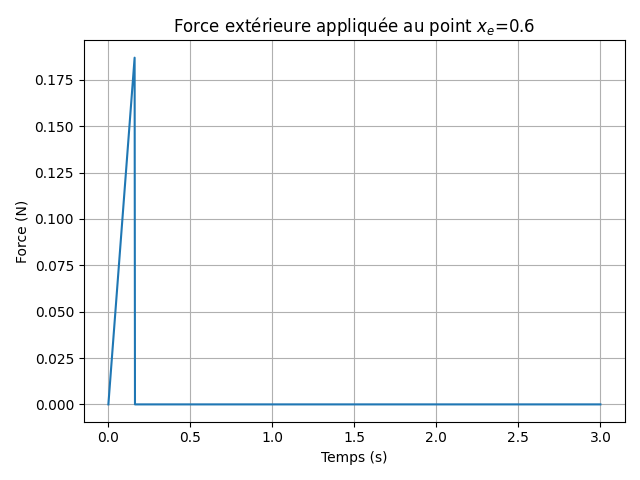

In [4]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]
Q,Q_pos, F= f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
display(Audio(Q,rate=Fe))  ## article

In [ ]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]
Q = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 

In [ ]:
display(Audio(Q,rate=Fe))  ## acier_2C

In [ ]:
T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[0]
Q = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
display(Audio(Q,rate=Fe))  ## acier_1C

In [5]:
from scipy.io import wavfile, loadmat
C1P1mat = loadmat("../../Mesures/Mesures_2023.01.27_LAM_normalise/Medium_1/Corde_Acier/C_3_P_4.mat")
acc = C1P1mat["acc_t"].reshape(-1)
fs2 = int(C1P1mat["fs"].reshape(-1))

In [ ]:
display(Audio(acc,rate = fs2))

In [6]:
import numpy as np
Nfft = len(acc)
Y2 = np.fft.rfft(acc, Nfft)
fy2 = np.fft.rfftfreq(Nfft,1/fs2)

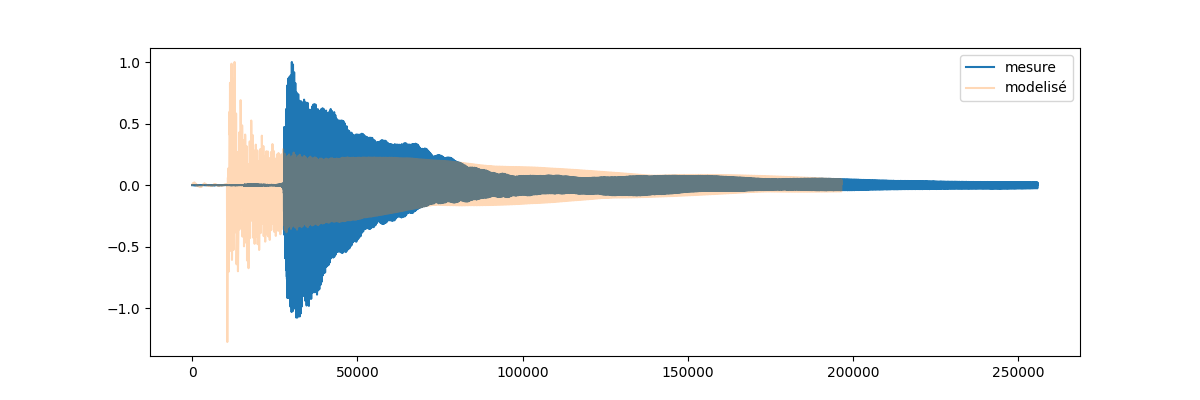

In [9]:
plt.figure(figsize=(12,4))
plt.plot(acc/max(acc),label='mesure')
plt.plot(Q/max(Q),label='modelisé',alpha = 0.3)
plt.legend()
plt.show()

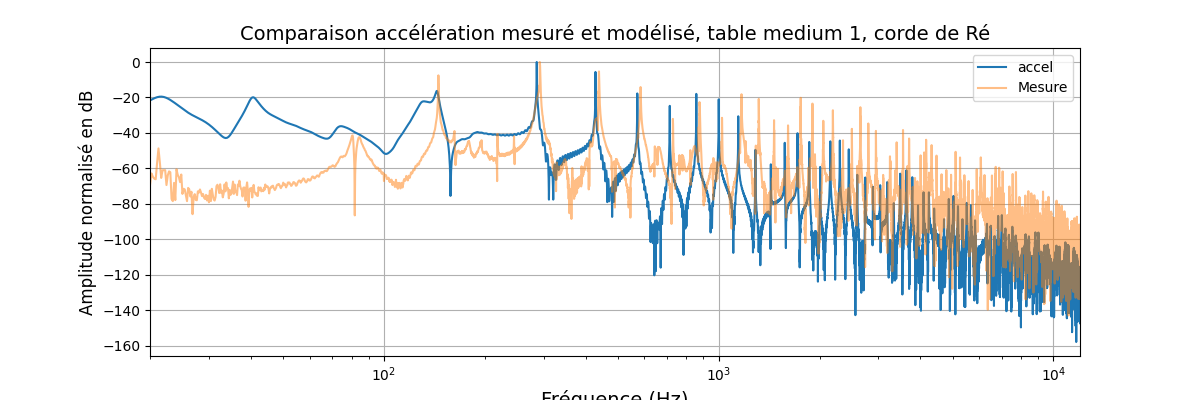

In [8]:

Q_f = np.fft.rfft(Q_pos)
Q_f2 = np.fft.rfft(Q)

F_f1 = np.fft.rfft(F)
#F_f2 = np.fft.rfft(F_2)

freq = np.fft.rfftfreq(len(Q_pos)) * Fe

import matplotlib.pyplot as plt
%matplotlib widget

plt.figure(figsize=(12,4))
#plt.semilogx(freq,20*np.log10(np.abs(Q_f)/np.max(np.abs(Q_f))),label='pos')
plt.semilogx(freq,20*np.log10(np.abs(Q_f2)/np.max(np.abs(Q_f2))),label='accel')

#plt.semilogx(freq,20*np.log10(np.abs(F_f1)/np.max(np.abs(F_f1))),label='Force_corde')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2)/np.max(np.abs(F_f2))),label='Force_table')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2 / F_f)),label='Force dif')

plt.semilogx(fy2, 20*np.log10(np.abs(Y2)/np.max(np.abs(Y2))),label='Mesure',alpha = 0.5)

plt.xlim(20,12000)
plt.legend()
plt.title("Comparaison accélération mesuré et modélisé, table medium 1, corde de Ré",size=14)
plt.xlabel("Fréquence (Hz)",size=14)
plt.ylabel("Amplitude normalisé en dB",size=12)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
#plt.semilogx(freq,20*np.log10(np.abs(Q_f)/np.max(np.abs(Q_f))),label='pos')
plt.semilogx(freq,20*np.log10(np.abs(Q_f2)/np.max(np.abs(Q_f2))),label='accel')

plt.semilogx(freq,20*np.log10(np.abs(F_f1)/np.max(np.abs(F_f1))),label='Force_corde')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2)/np.max(np.abs(F_f2))),label='Force_table')
#plt.semilogx(freq,20*np.log10(np.abs(F_f2 / F_f)),label='Force dif')

#plt.semilogx(fy2, 20*np.log10(np.abs(Y2)/np.max(np.abs(Y2))),label='Mesure',alpha = 0.5)

plt.xlim(20,12000)
plt.legend()
plt.title("Comparaison force et accélération modélisé, table medium 1, corde de Ré",size=14)
plt.xlabel("Fréquence (Hz)",size=12)
plt.ylabel("Amplitude normalisé en dB",size=14)
plt.grid()
plt.show()

In [ ]:
display(Audio(Q,rate=Fe))

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe) 
    #display(Audio(F,rate=Fe))  
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]

with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## medium 2

In [ ]:
Fichier = "1ier_data_set/medium_2/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = True, 
                                             metal_T = False,
                                             plexi_T = False)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)   
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]
    
with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## Acier : 

In [ ]:
Fichier = "1ier_data_set/acier/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = False, 
                                             metal_T = True,
                                             plexi_T = False)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)  
    #display(Audio(F,rate=Fe)) 
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]
    
with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)


## Plexi : 

In [ ]:
Fichier = "1ier_data_set/plexi/"
N_sample, param_dataset, xinB = param_Dataset(N_sample=200,
                                             article_C = True,
                                             acier_1C = False,
                                             acier_2C = False, 
                                             medium_1T = False, 
                                             medium_2T = False, 
                                             metal_T = False,
                                             plexi_T = True)

In [ ]:
for i in range(N_sample):
    T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly = param_dataset[i]
    F = f.Main(T,rho_l,L,B,h,E_nu,rhoT,Lx,Ly,xinB,Fe)   
    write(Fichier + str(i) + '.wav',rate=Fe ,data = F / max(F))

In [ ]:
dico = {}
for i in range(N_sample):
    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['T_corde'] = param_dataset[i][0]
    dico[kle]['rho_l_corde'] = param_dataset[i][1]
    dico[kle]['L_corde'] = param_dataset[i][2]
    dico[kle]['B_corde'] = param_dataset[i][3]
    dico[kle]['h_table'] = param_dataset[i][4]
    dico[kle]['E_nu_table'] = param_dataset[i][5]
    dico[kle]['rho_table'] = param_dataset[i][6]
    dico[kle]['Lx_table'] = param_dataset[i][7]
    dico[kle]['Ly_table'] = param_dataset[i][8]

with open(Fichier + 'parametres.pickle', 'wb') as f:
    pickle.dump(dico, f)
